In [1]:
from ruletree.tree.RuleTreeCluster import RuleTreeCluster
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#initialize training data
breast = load_breast_cancer()
feature_names = breast.feature_names
X = breast.data
y = breast.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

You can initialize a RuleTreeCluster similarly to sklearn Decision Trees. Analogous fit/predict function can be used

In [5]:
#initialize classifier

#prune_useless_leaves allows us to prune leaves with same prediction outcome
rtclu = RuleTreeCluster(max_depth = 3, 
                        criterion = 'squared_error',
                        prune_useless_leaves=True,
                        random_state = 42,
                        bic_eps= 0.2
                        )

#fit RuleTreeClassifier
rtclu.fit(X_train)

#get textual rules dictionary
rules = rtclu.get_rules()

In [6]:
y_pred = rtclu.predict(X_test)
print('Prediction results', y_pred[0:10])

Prediction results [0 2 2 0 0 3 3 2 2 7]


In [7]:
#print textual rules of trained tree
rtclu.print_rules(rules)

|--- X_7 <= 0.059	398
|   |--- X_22 <= 97.665	269
|   |   |--- X_22 <= 76.405	192
|   |   |    output: 6
|   |   |--- X_22 > 76.405
|   |   |    output: 0
|   |--- X_22 > 97.665
|   |   |--- X_3 <= 857.85	77
|   |   |    output: 7
|   |   |--- X_3 > 857.85
|   |   |    output: 5
|--- X_7 > 0.059
|   |--- X_6 <= 0.198	129
|   |   |--- X_14 <= 0.008	90
|   |   |    output: 2
|   |   |--- X_14 > 0.008
|   |   |    output: 4
|   |--- X_6 > 0.198
|   |   |--- X_23 <= 1338.0	39
|   |   |    output: 1
|   |   |--- X_23 > 1338.0
|   |   |    output: 3


In [8]:
##get global feature explanations similar to sklearn feature_importances_ of a trained Decision Tree
feture_importances = rtclu.compute_feature_importances()
feture_importances

array([0.        , 0.        , 0.        , 0.05004601, 0.        ,
       0.        , 0.07146214, 0.5292868 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03551766,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.27448806, 0.03919933, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

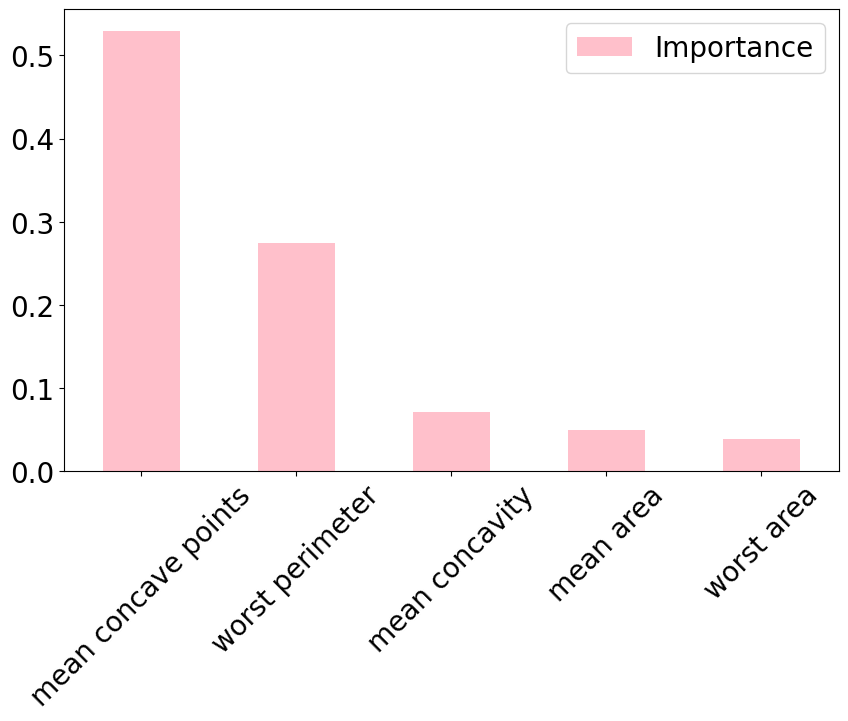

In [14]:
feat_importances = pd.DataFrame(feture_importances, index=feature_names, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.head(5).plot(kind='bar', figsize=(10,6), color = 'pink')
plt.xticks(fontsize=20, rotation = 45)          
plt.yticks(fontsize=20)                     
plt.legend(fontsize=20)  
plt.show()